# Analysis of the 2D concentric rings structure

The second-order dispersion $D_2$ of the supermodes are analyzed based on data files

Author: Weihao Xu

Date: May. 12th, 2025

In [98]:
import numpy as np
import pandas as pd
import re
from Functions import *

## Load data files using pandas

In [99]:
# These CSV files are generated by the "Data_analyzer" class, recording the dispersion at different wavelengths
filename_D_iso      = "./results/2D concentric rings/Supermodes attributes using CMT/Dispersion_isolated_WG.csv"
filename_D_coupled  = "./results/2D concentric rings/Supermodes attributes using CMT/Dispersion_coupled_WG.csv"

In [100]:
df_iso      = pd.read_csv(filename_D_iso)
df_coupled  = pd.read_csv(filename_D_coupled)

In [101]:
# Selecting the range of the gap to be plotted
gap_range = (2.5,3.5)

In [102]:
gap_arr = []
data_arr = []
AD_range_list = []

In [103]:
fold_num = 10           # make a wavl tick every 10 wavl points
wavl_arr        = df_coupled["wavl"]
num_of_wavl_pts = len(wavl_arr)
wavl_ticks      = np.arange(0,num_of_wavl_pts,int(num_of_wavl_pts/fold_num))
wavl_labels     = ["{:.3f}".format(wavl_arr[idx]) for idx in wavl_ticks]

In [104]:
# Regular expression to match the column names
pattern = r'^(\w+)\(\s*(-?\d+\.?\d*)\s*,\s*(-?\d+\.?\d*)\s*\)$'
for column in df_coupled.columns[1:]:
    match = re.match(pattern, column)
    if match:
        label = match.group(1)
        gapx = float(match.group(2))  # 转换为整数
        gapy = float(match.group(3))
    else:
        print("No match for " + label)
        continue
    gap = np.sqrt(gapx**2 + gapy**2)
    if gap < min(gap_range) or gap > max(gap_range):
        continue
    gap_arr.append(gap)
    data_arr.append(df_coupled[column])

data_arr = np.array(data_arr)

In [105]:
# Find the zero dispersion points
data_arr_zero_loc_list = []
for i in range(np.shape(data_arr)[0]):
    line = data_arr[i,:]
    min_zero_idx = len(line)
    max_zero_idx = 0
    for j in range(len(line)-1):
        if line[j] * line[j+1] < 0:
            if j<=min_zero_idx:
                min_zero_idx = j
            if j>=max_zero_idx:
                max_zero_idx = j
            data_arr_zero_loc_list.append([j,i])
    AD_range_list.append([gap_arr[i], max_zero_idx-min_zero_idx,])

AD_range_list = np.array(AD_range_list)
data_arr_zero_loc_list = np.array(data_arr_zero_loc_list)

## Find the gap which can bring the largest Anomalous Dispersion range

In [106]:
# format: [gap (unit: um), Anomalous Dispersion range (unit: wavl pts)]
AD_range_list

array([[  2.5,  83. ],
       [  2.6,  96. ],
       [  2.7, 101. ],
       [  2.8, 101. ],
       [  2.9, 100. ],
       [  3. ,  98. ],
       [  3.1,  95. ],
       [  3.2,  92. ],
       [  3.3,  88. ],
       [  3.4,  83. ],
       [  3.5,  75. ]])

In [107]:
best_gap, best_AD_range = AD_range_list[np.argmax(AD_range_list[:,1]),:]
best_AD_range_in_nm =  (np.max(wavl_arr) - np.min(wavl_arr))/len(wavl_arr) * best_AD_range * 1e3
print("best gap: {:.2f} um".format(best_gap))
print("best AD range: {:.2f} nm".format(best_AD_range_in_nm))

best gap: 2.70 um
best AD range: 18.18 nm


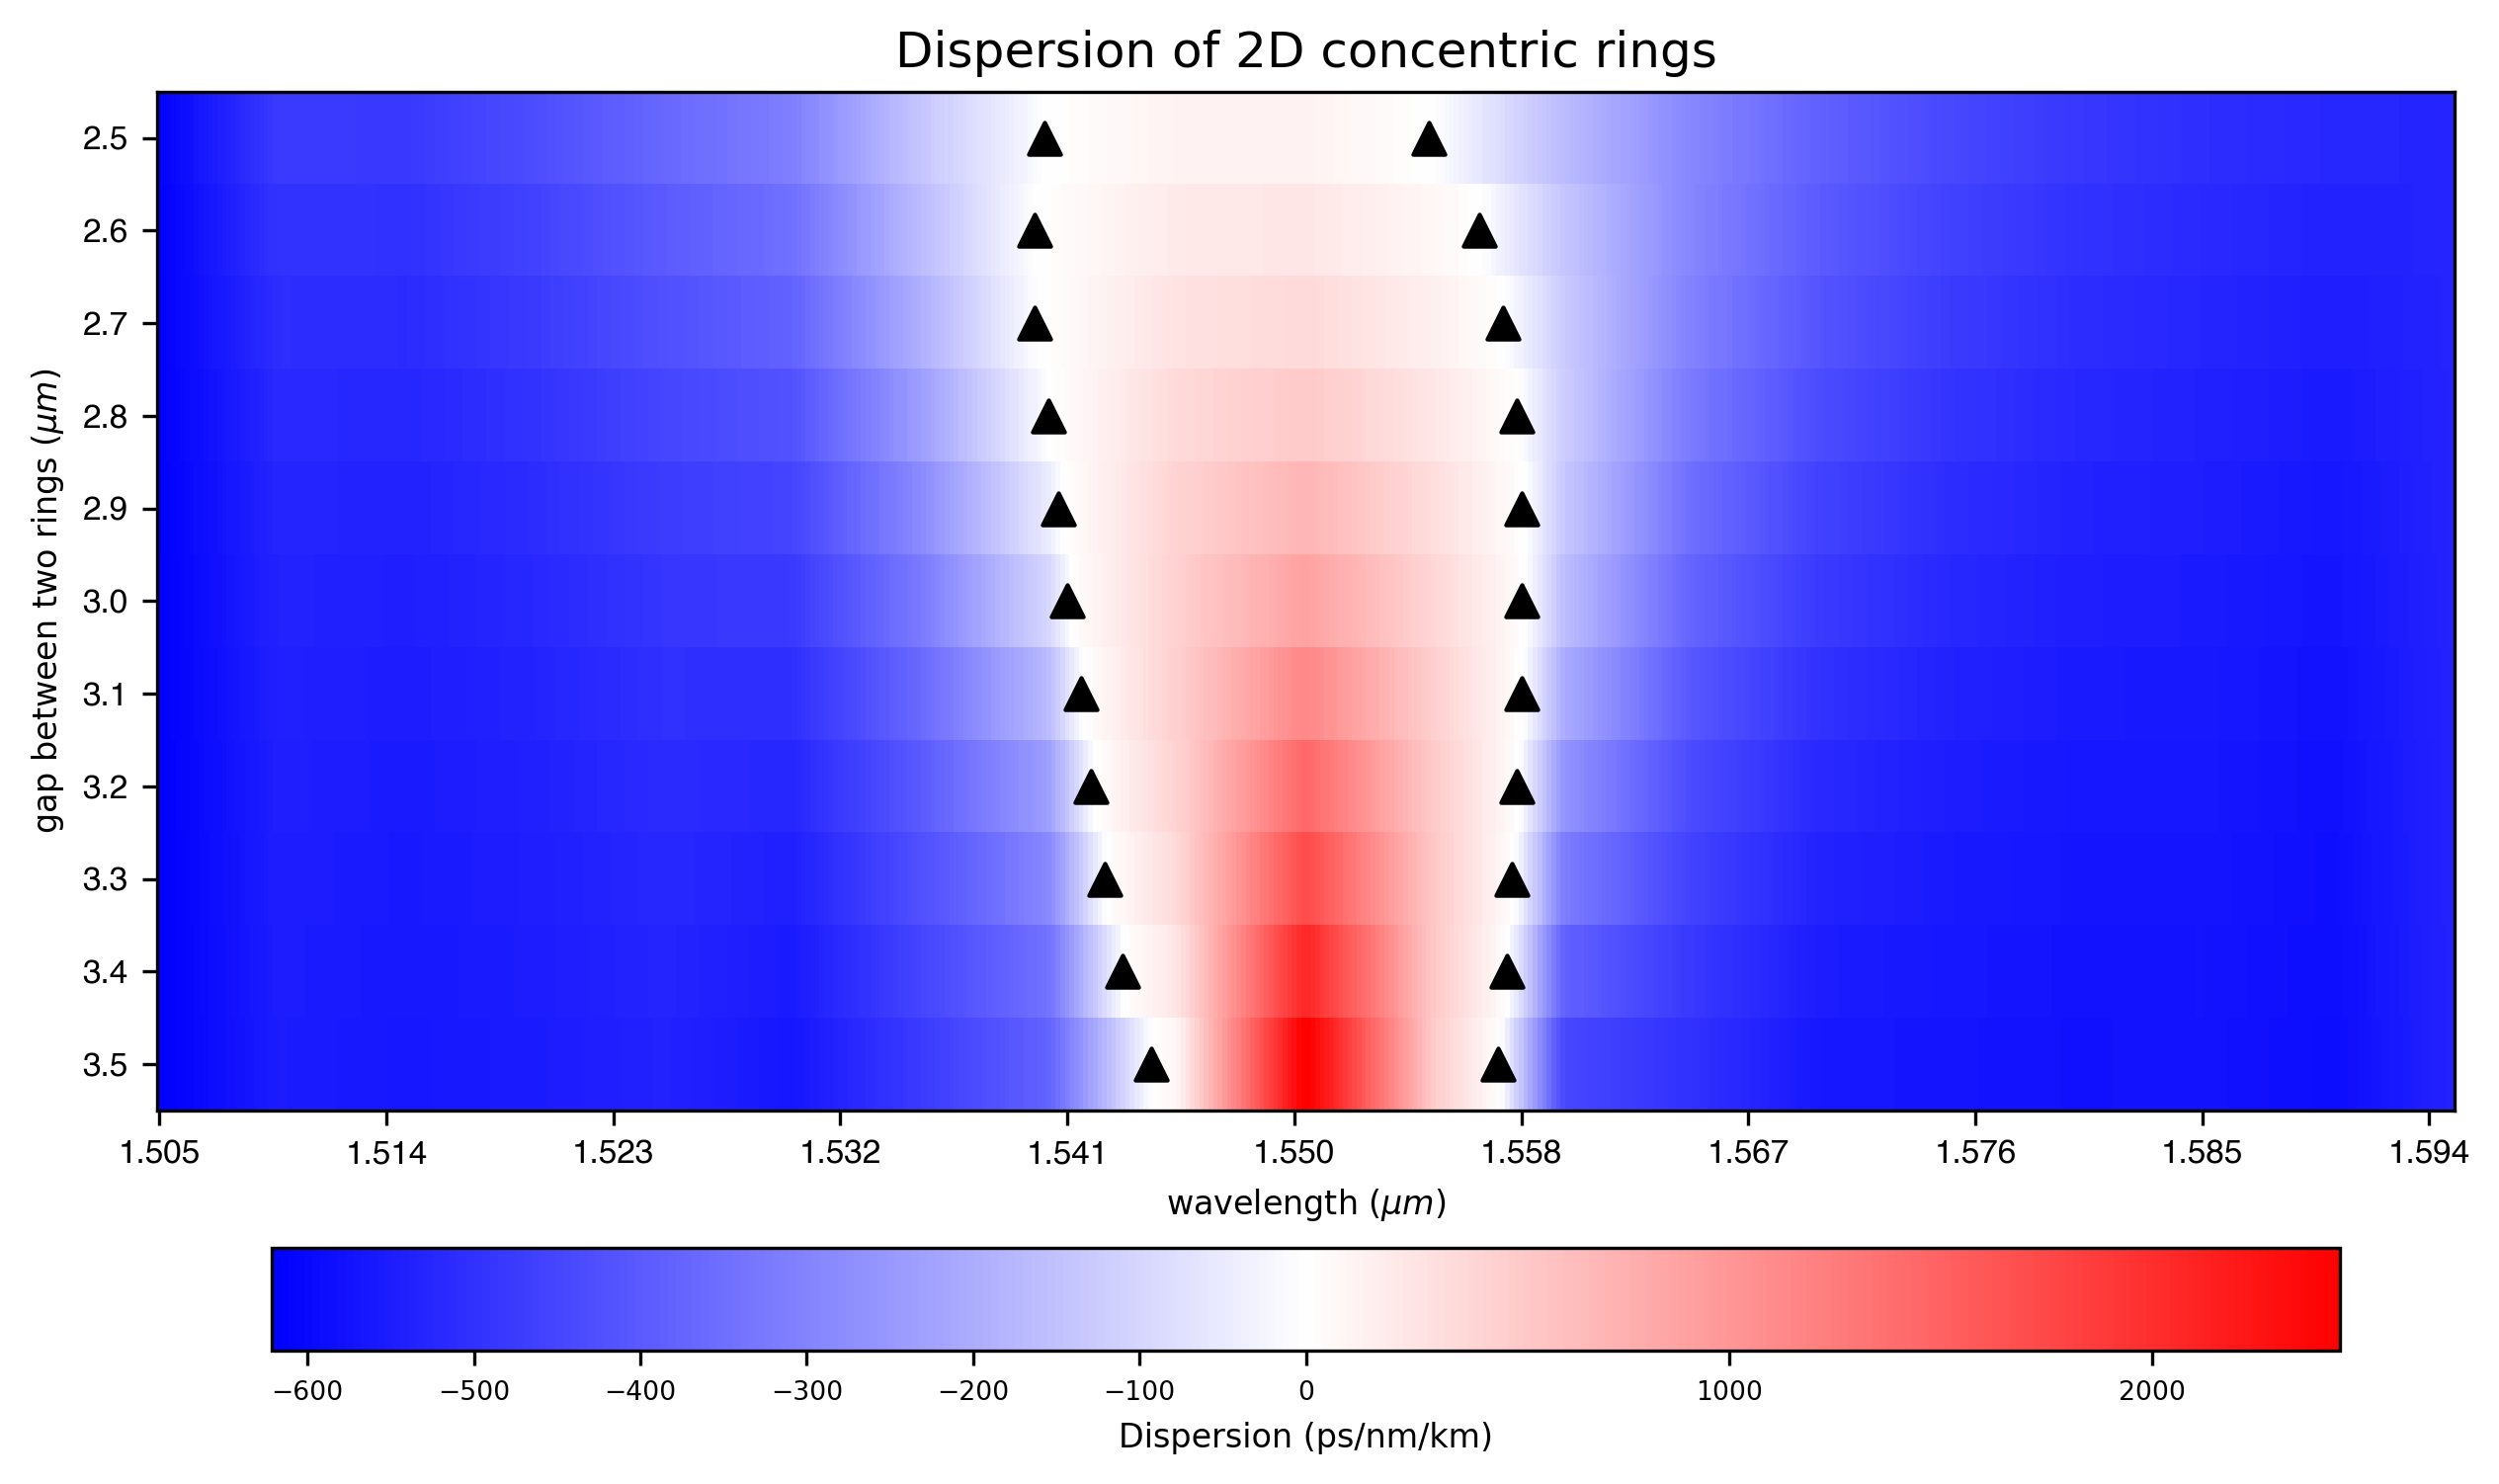

In [108]:
param_dict = {
        "figsize"       : [8,8],
        "point_color"   : 'black',
        "point_size"    : 60,
        # "point_marker"  : ".",
        "point_marker"  : "^",
        "norm"          : 'zero_in_center',
        "colormap"      : "bwr",
        "aspect"        : 20,
        "xlabel"        : r"wavelength ($\mu m$)",
        "ylabel"        : r"gap between two rings ($\mu m$)",
        "cbar_label"    : r"Dispersion (ps/nm/km)",
        "cbar_small_ticks" : False,
        "figsize"       : (10,6),
        "title"         : "Dispersion of 2D concentric rings",
        "xticks"        : wavl_ticks,
        "yticks"        : np.arange(0,len(gap_arr),1),
        "xtickslabel"   : wavl_labels,
        "ytickslabel"   : gap_arr,
        "fontsize"      : 8,
        "foldername"    : "./results/"
}
Plot_im(data_arr, point_arr = data_arr_zero_loc_list, **param_dict)